# ML Term Paper - Code: Models
by Ann-Christin and Sarah 15/02/2021

## 1. Preparation

In [46]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


from sklearn import ensemble
from sklearn import tree as tree

# set color theme
sns.set_theme()

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [47]:
import os
path = "E:/Data/krea/PIAAC" #enter your path here
#path = "C:/Users/gust/Documents/ML_term_paper"
os.chdir(path)
print("done")
data = pd.read_csv("Data/piaac_red.csv", sep=',', error_bad_lines=False, index_col=False)
data.shape

done


E:\Anaconda3\envs\base-krea\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (1,4,11,17,22,24,25,28,30,31,38,47,50,57,58,59,62,63,65,68,75,84,85,86,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(230691, 129)

In [48]:
data.describe()

,Unnamed: 0,inpiaac,seqid,age_r,j_q03b,j_q03b_c,racethn_5cat,yrsqual,yrsqual_t,yrsget,...,readytolearn,icthome,ictwork,earnmthallppp,earnmthbonusppp,earnmthselfppp,nfehrsnjr,nfehrsjr,nfehrs,unempflag
count,230691.000000,3660.000000,230691.000000,166949.000000,103091.000000,144543.000000,3472.000000,218593.000000,213568.000000,125736.000000,...,226734.000000,171755.000000,102478.000000,8.850800e+04,7.677600e+04,11732.000000,54687.000000,54687.000000,80121.000000,3477.000000
mean,115345.000000,0.900546,4401.442982,39.687485,2.258296,2.165992,2.247408,12.536184,12.546814,12.567069,...,2.037301,2.028157,2.016022,3.157575e+03,3.259009e+03,2493.775348,55.298554,84.441805,140.938755,0.039689
std,66594.899812,0.299311,4735.160301,14.302125,1.264413,0.940666,0.982485,3.289158,3.300026,3.516878,...,1.024525,1.008360,1.021538,6.821093e+04,7.313718e+04,9771.976917,198.082778,196.587656,301.342789,0.195257
min,0.000000,0.000000,1.000000,16.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,-1.074991,-1.209050,0.008980,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57672.500000,1.000000,1649.000000,27.000000,1.000000,1.000000,2.000000,11.000000,11.000000,11.000000,...,1.355049,1.338901,1.210520,9.259300e+02,1.016686e+03,200.162500,0.000000,9.000000,16.000000,0.000000
50%,115345.000000,1.000000,3298.000000,39.000000,2.000000,2.000000,2.000000,12.000000,12.000000,13.000000,...,1.992110,2.088670,1.854941,1.790609e+03,1.864409e+03,1014.449100,0.000000,30.000000,40.000000,0.000000
75%,173017.500000,1.000000,5008.000000,52.000000,3.000000,3.000000,2.000000,15.000000,15.000000,15.000000,...,2.588965,2.683840,2.624086,3.177483e+03,3.212351e+03,2827.312600,20.000000,80.000000,112.000000,0.000000
max,230690.000000,1.000000,27285.000000,65.000000,25.000000,4.000000,6.000000,23.000000,23.000000,23.000000,...,4.643640,7.710160,5.463352,1.187756e+07,1.187756e+07,856174.200000,1920.000000,1920.000000,1920.000000,1.000000


In [49]:
data.head()


,Unnamed: 0,cntryid,inpiaac,seqid,cnt_brth,ageg10lfs,age_r,gender_r,j_q03b,j_q03b_c,...,nfe12jr,nfe12njr,fnfaet12,fnfaet12jr,fnfaet12njr,nfehrsnjr,nfehrsjr,nfehrs,nopaidworkever,unempflag
0,0,84093.0,1.0,9355.0,NaN,NaN,NaN,Male,NaN,3.0,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
1,1,84093.0,1.0,10882.0,NaN,NaN,NaN,Male,NaN,NaN,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,30.0,30.0,Has had paid work,0.0
2,2,84093.0,1.0,12329.0,NaN,NaN,NaN,Female,NaN,4.0,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
3,3,84093.0,1.0,10711.0,NaN,NaN,NaN,Female,NaN,NaN,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,NaN,NaN,8.0,Has had paid work,0.0
4,4,84093.0,1.0,10383.0,NaN,NaN,NaN,Male,NaN,1.0,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,80.0,80.0,Has had paid work,0.0


In [50]:
# data cleaning, drop variables that have too few observations,are not relevant or collinear
dcl = data.drop(columns = ['Unnamed: 0', 'inpiaac', "racethn_5cat", "unempflag", "racethn_5cat", "c_q08c2", "seqid", "b_q04b", "b_q19a", 
                         "c_q08c2", "learnatwork", "nfehrsnjr", "nfehrsjr", "nfehrs", "earnmthselfppp", "d_q05b2", 
                          "yrsqual_t", "earnmthbonusppp",  "d_q16d5", "c_q02c", "isco1c", "c_d09", "isic1l", "cnt_h", "isced_hf", "isco1l", "isco1c", "c_d05",
                          'icthome','ictwork','b_q01a','b_q01a_t','yrsqual','ageg10lfs','cnt_brth','fnfaet12jr', 'fe12', 'aetpop', 'faet12', 'faet12jr', 'faet12njr', 
                           'nfe12', 'nfe12jr', 'nfe12njr', 'fnfaet12', 'fnfaet12jr', 'fnfaet12njr']) # exlude those to test the results 
#"isic2l", "isic2c", "isic_cus_c", "isic_lus_c", "isic4_c", "isic4_l",'cntry', 'cntry_e',

# further exclude 
dcl = dcl.drop(columns = ['d_q16b', 'b_q20b', 'b_d12h', 'b_q02a_t2', 'b_q11', 'b_q12e', 'b_q12a', 'd_q12a' , 'b_q04a', 'b_q16', 'b_q26b', 'b_q15c', 'd_q06c', 'b_q15b', 'd_q05a2', 
                          'b_q13', 'b_q15a', 'b_q16', 'b_q12c', 'b_q02a', 'b_q02a_t1', 'b_q05c', 'b_q10b', 'c_d06', 'd_q04', 'b_q12g', 'b_q12a'])


dcl = dcl.loc[:, ~dcl.columns.str.endswith('_c')]
#drop if skill level is missing 
#dcl = dcl[dcl.iscoskil4 != "A"]
#dcl = dcl[dcl.iscoskil4 != "N"]
#dcl = dcl[dcl.iscoskil4 != "U"]

In [51]:
#dcl['d_q05a2'] = dcl['d_q05a2'].astype('object')
dcl['gender_r'] = dcl['gender_r'].astype('category')
dcl["age_r"] = pd.to_numeric(dcl["age_r"])
#dcl['b_q12a'] = dcl['b_q12a'].astype('category') # yes/no open educational training
dcl['b_q12b'] = pd.to_numeric(dcl["b_q12b"]) # number of open/distance educational trainings
dcl["b_q12d"] = pd.to_numeric(dcl["b_q12d"]) # number of on-the-job training
#dcl['b_q12e'] = dcl['b_q12e'].astype('category')  # yes/no seminars training
dcl['b_q12f'] = pd.to_numeric(dcl["b_q12f"]) # number of seminars
#dcl['b_q12g'] = dcl['b_q12g'].astype('category')  # yes/no private training
dcl['b_q12h'] = pd.to_numeric(dcl["b_q12h"]) # number of private educational trainings
# dcl['j_q03a'] = dcl['j_q03a'].astype('category') # yes/no children
dcl['j_q03b'] = pd.to_numeric(dcl['j_q03b']) # number of children
#dcl['yrsqual_t'] = pd.to_numeric(dcl['yrsqual_t'])
dcl['yrsget'] = pd.to_numeric(dcl['yrsget'])
dcl['iscoskil4'] = dcl['iscoskil4'].astype('category')
#dcl['h_q05g'] = dcl['h_q05g'].astype('category') # Skill use everyday life - ICT - Computer - How often - Programming language  
dcl['g_q05g'] = dcl['g_q05g'].astype('category') # skill use work - ICT programming lanugage how often
#dcl['g_q05'] = dcl['g_q05'].astype('category') # use computer at work yes/no

In [52]:
#thresh = len(dcl) * .18
#dcl.dropna(thresh = thresh, axis = 1, inplace = True)
dcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 52 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   cntryid             230691 non-null  object  
 1   age_r               166949 non-null  float64 
 2   gender_r            230689 non-null  category
 3   j_q03b              103091 non-null  float64 
 4   j_q04a              228012 non-null  object  
 5   pared               215610 non-null  object  
 6   computerexperience  227980 non-null  object  
 7   yrsget              125736 non-null  float64 
 8   vet                 102508 non-null  object  
 9   edcat8              188436 non-null  object  
 10  leaver1624          43455 non-null   object  
 11  b_q01b              168921 non-null  object  
 12  b_q10a              38742 non-null   object  
 13  b_q10c              23065 non-null   object  
 14  b_q12b              16053 non-null   float64 
 15  b_q12d           

In [53]:
cate = dcl.select_dtypes(include=['object', 'category'])
cate = cate.drop(columns = ["iscoskil4"]) 
cate = list(set(cate))
cate

['g_q08',
 'd_q03',
 'g_q05g',
 'd_q07a',
 'b_q14b',
 'b_q14a',
 'd_q09',
 'edcat8',
 'd_q13c',
 'g_q05a',
 'vet',
 'g_q05h',
 'c_q02a',
 'nopaidworkever',
 'g_q05f',
 'leaver1624',
 'g_q07',
 'j_q04a',
 'b_q10c',
 'g_q04',
 'b_q26a_t',
 'g_q05d',
 'd_q04_t',
 'gender_r',
 'g_q05e',
 'pared',
 'f_q07a',
 'd_q14',
 'b_q01b',
 'd_q06a',
 'cntryid',
 'd_q12c',
 'g_q05c',
 'f_q07b',
 'd_q06b',
 'isic1c',
 'd_q12b',
 'g_q06',
 'b_q10a',
 'computerexperience']

In [54]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1

,g_q08_Yes,d_q03_The private sector (for example a company),d_q03_The public sector (for example the local government or a state school),g_q05g_Every day,g_q05g_Less than once a month,g_q05g_Less than once a week but at least once a month,g_q05g_Never,d_q07a_Yes,b_q14b_Other,b_q14b_To be less likely to lose my job,...,isic1c_R,isic1c_S,isic1c_T,isic1c_U,d_q12b_A lower level would be sufficient,d_q12b_This level is necessary,g_q06_Moderate,g_q06_Straightforward,b_q10a_Yes,computerexperience_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
230687,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
230688,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
230689,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [55]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1 = pd.DataFrame(dummies1)
dummies2 = dummies2.pop(0)
dummies2 = pd.DataFrame(dummies2)
dummies = dummies1.join(dummies2)
#dummies = dummies.drop(columns = ["skill_4","skill_U", "skill_A", "skill_N"])
dummies = dummies.drop(columns = ["skill_4","skill_U", "skill_A", "skill_N"])
dummies.head()
dummies.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Columns: 180 entries, g_q08_Yes to skill_3
dtypes: uint8(180)
memory usage: 39.6 MB


In [56]:
num = dcl.select_dtypes(include=['float64', "int32"])
num = num.loc[:, ~num.columns.str.startswith('b_q12')]

In [57]:
num.head()
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age_r          166949 non-null  float64
 1   j_q03b         103091 non-null  float64
 2   yrsget         125736 non-null  float64
 3   c_q09          160575 non-null  float64
 4   c_q10a         147420 non-null  float64
 5   readytolearn   226734 non-null  float64
 6   earnmthallppp  88508 non-null   float64
dtypes: float64(7)
memory usage: 12.3 MB


In [58]:
num_list = list(set(num))
num_list

['c_q09',
 'j_q03b',
 'age_r',
 'readytolearn',
 'earnmthallppp',
 'yrsget',
 'c_q10a']

In [59]:
# define X and y
on_job = dcl["b_q12d"] #define y here
open_educ = dcl["b_q12b"]
X = num.join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns = X.columns)
y = pd.DataFrame(dict(on_job=on_job, open_educ =open_educ))
y_X = y.join(X)
y_X

,on_job,open_educ,age_r,j_q03b,yrsget,c_q09,c_q10a,readytolearn,earnmthallppp,g_q08_Yes,...,isic1c_U,d_q12b_A lower level would be sufficient,d_q12b_This level is necessary,g_q06_Moderate,g_q06_Straightforward,b_q10a_Yes,computerexperience_Yes,skill_1,skill_2,skill_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016017,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,19.0,NaN,NaN,2.164922,NaN,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.177736,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.112932,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.064464,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,NaN,NaN,NaN,NaN,8.0,NaN,NaN,1.177736,NaN,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
230687,NaN,NaN,NaN,NaN,11.0,NaN,NaN,2.156445,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
230688,NaN,NaN,NaN,NaN,11.0,NaN,NaN,2.383062,NaN,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
230689,NaN,NaN,NaN,NaN,12.0,NaN,NaN,1.751830,NaN,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
on_job.describe()

count    46750.000000
mean         3.252021
std          4.441589
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: b_q12d, dtype: float64

In [61]:
open_educ.describe()

count    16053.000000
mean         2.517660
std          3.785557
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: b_q12b, dtype: float64

## 2. OLS
### 2.1 OLS 'on the job training'

In [62]:
import statsmodels.api as sm
nona = y_X.drop(columns = ["open_educ","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]
y = nona["on_job"]
X = nona.iloc[:, 1:]


est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 on_job   R-squared (uncentered):                   0.423
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              73.81
Date:                Wed, 10 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:20:46   Log-Likelihood:                         -45402.
No. Observations:               16337   AIC:                                  9.113e+04
Df Residuals:                   16176   BIC:                                  9.237e+04
Df Model:                         161                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
age_r                                                                                    -0.0208      0.006     -3.366      0.001      -0.033      -0.009
j_q03b                                                                                   -0.0212      0.033     -0.638      0.523      -0.086       0.044
yrsget                                                                                    0.0593      0.017      3.473      0.001       0.026       0.093
c_q09                                                                                     0.0183      0.006      3.094      0.002       0.007       0.030
c_q10a                                                                                    0.0775      0.022      3.494      0.000       0.034       0.121
readytolearn                                                                              0.1598      0.037      4.356      0.000       0.088       0.232
earnmthallppp                                                                           3.34e-06   2.25e-06      1.486      0.137   -1.07e-06    7.75e-06
g_q08_Yes                                                                                 0.0807      0.135      0.599      0.549      -0.183       0.345
d_q03_The private sector (for example a company)                                          0.1566      0.183      0.858      0.391      -0.201       0.515
d_q03_The public sector (for example the local government or a state school)              0.4012      0.181      2.211      0.027       0.046       0.757
g_q05g_Every day                                                                          0.1904      0.257      0.740      0.459      -0.314       0.695
g_q05g_Less than once a month                                                             0.4493      0.255      1.759      0.079      -0.051       0.950
g_q05g_Less than once a week but at least once a month                                    0.1318      0.298      0.442      0.659      -0.453       0.717
g_q05g_Never                                                                              0.4783      0.214      2.237      0.025       0.059       0.897
b_q14b_Other                                                                              0.1186      0.237      0.501      0.617      -0.346       0.583
b_q14b_To be less likely to lose my job                                                   0.1363      0.342      0.398      0.690      -0.534       0.807
b_q14b_To do my job better and/or improve career prospects

### 2.2 OLS 'open education'

In [63]:
# run OLS open educ
import statsmodels.api as sm

nona = y_X.drop(columns = ["on_job","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]
y = nona["open_educ"]
X = nona.iloc[:, 1:]


est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              open_educ   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              16.60
Date:                Wed, 10 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:20:54   Log-Likelihood:                         -11907.
No. Observations:                4368   AIC:                                  2.414e+04
Df Residuals:                    4207   BIC:                                  2.516e+04
Df Model:                         161                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
age_r                                                                                    -0.0130      0.012     -1.104      0.270      -0.036       0.010
j_q03b                                                                                   -0.0463      0.066     -0.705      0.481      -0.175       0.083
yrsget                                                                                    0.0174      0.034      0.512      0.608      -0.049       0.084
c_q09                                                                                     0.0213      0.011      1.884      0.060      -0.001       0.043
c_q10a                                                                                    0.0017      0.046      0.038      0.970      -0.088       0.091
readytolearn                                                                              0.2058      0.065      3.167      0.002       0.078       0.333
earnmthallppp                                                                         -3.198e-06    2.8e-06     -1.142      0.254   -8.69e-06    2.29e-06
g_q08_Yes                                                                                -0.3746      0.250     -1.496      0.135      -0.865       0.116
d_q03_The private sector (for example a company)                                         -0.4017      0.341     -1.177      0.239      -1.071       0.268
d_q03_The public sector (for example the local government or a state school)              0.0701      0.340      0.206      0.837      -0.596       0.737
g_q05g_Every day                                                                         -0.8436      0.418     -2.019      0.044      -1.663      -0.024
g_q05g_Less than once a month                                                            -0.6749      0.425     -1.586      0.113      -1.509       0.159
g_q05g_Less than once a week but at least once a month                                   -0.5219      0.480     -1.088      0.277      -1.462       0.418
g_q05g_Never                                                                             -0.4240      0.352     -1.206      0.228      -1.113       0.265
b_q14b_Other                                                                             -0.3847      0.479     -0.802      0.422      -1.325       0.555
b_q14b_To be less likely to lose my job                                                   1.8780      0.750      2.504      0.012       0.407       3.349
b_q14b_To do my job better and/or improve career prospects

#### Interpretation of first OLS results
OLS of open education indicates that high-skilled are more likely compared to lower skilled occupations to participate in open education.
OLS of on the job training indicates that high-skilled are less likely to particpate compared to low skill levels. However, the coefficients are not significant for both the open and the on-the-job education. Possible problem might be collinearity in the data set. 
Also, the condition number is large, 6.84e+05. This might indicate that there are strong multicollinearity or other numerical problems. 
Using Machine Learning techniques like Lasso, we should be able to eliminate the irrelevant explanatory variables and get a better fit.

## 3. Comparing OLS and Lasso

In [66]:


from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFdr 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
print('done')

done


### 3.1 On the job training

In [104]:
nona = y_X.drop(columns = ["open_educ","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]


In [105]:
y = nona["on_job"]
X = nona.iloc[:, 1:]

#X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
#X = StandardScaler().fit_transform(X)

In [106]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score

y = nona["on_job"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))


scores full
[0.04413954 0.03689827 0.03191469 0.06139811 0.0604376 ]
Accuracy: 0.04696 (+/- 0.02409)


In [107]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
import time
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0295 
Training time =  1.3791s 


In [108]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.05094428 0.04127284 0.04194906 0.05794646 0.05394712]
Accuracy: 0.04921 (+/- 0.01319)


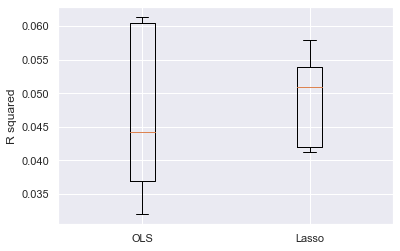

In [72]:
fig, ax = plt.subplots()
ax.boxplot([scores_full,scores_lasso])
plt.xticks([1, 2], ['OLS', 'Lasso'])
plt.ylabel('R squared')
#plt.title('Out-of-sample validation')
plt.savefig('Results/Plots/outofsample_validation_onJob.png', bbox_inches='tight')


NOTE: out-of-sample performance of regularized model (Lasso) appears to be better--> less noise in the data and thus no overfitting.

### 3.2. Open Education

In [73]:
nona = y_X.drop(columns = ["on_job","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]

In [74]:

y = nona["open_educ"]
X = nona.iloc[:, 1:]

#X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
#X = StandardScaler().fit_transform(X)

In [75]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score

y = nona["open_educ"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

scores full
[-0.00961504  0.00688624 -0.03395557 -0.04386874  0.0426989 ]
Accuracy: -0.00757 (+/- 0.06167)


In [76]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
import time
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0566 
Training time =  0.3774s 


In [77]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.00750916 0.02147945 0.02019739 0.00677548 0.04263966]
Accuracy: 0.01972 (+/- 0.02600)


Text(0, 0.5, 'R squared')

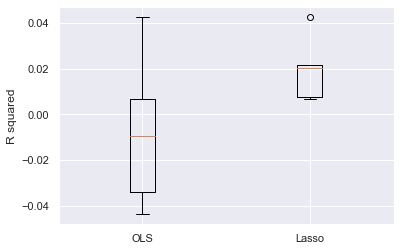

In [78]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_lasso])
plt.xticks([1, 2], ['OLS', 'Lasso'])
plt.ylabel('R squared')
#plt.title('Out-of-sample validation, open education')
plt.savefig('Results/Plots/outofsample_validation_openEduc.png', bbox_inches='tight')


## 4. Lasso
### 4.1 Lasso - on the job training

In [109]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

nona = y_X.drop(columns = ["open_educ","training","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]

y = nona["on_job"]
X = nona.iloc[:, 1:]



#X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
#X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))


In-sample Rsq:  0.0613
Out-of-sample Rsq:  0.0500


Computing regularization path using the lasso...
Ready


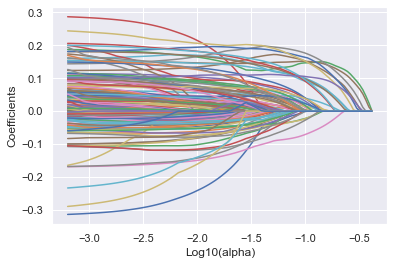

In [110]:
# lasso path
from sklearn.linear_model import lasso_path, enet_path

X = StandardScaler().fit_transform(X_train) 
# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y_train, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)
#plt.grid(axis='both')
plt.xlabel('Log10(alpha)')
plt.ylabel('Coefficients')
#plt.title('Lasso Path')
plt.axis('tight')

plt.savefig('Results/Plots/lasso_path_onJob.png', bbox_inches='tight')
#plt.show()


Lasso Path shows the path of estimated coefficients for different values of $\lambda$. When $\lambda$ approaches zero, we are close to the OLS with all the variables. The path also shows us the $\lambda$ when all the coefficients are zero (null model). For this graph such $\lambda$ is around log(-1). It is helpful for the next step, when we define the search grid to find the optimal $\lambda$. 
#### 4.1.1 Selecting optimal $\lambda$ with cross-validation

In [111]:
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-3, -2.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_train, y_train)
t_cv = time.time() - t1
print("Ready")

l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .6f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.003162 
Training time =  2.4713s 


(-3.025, -2.475, 13.953958000547237, 18.169316577404572)

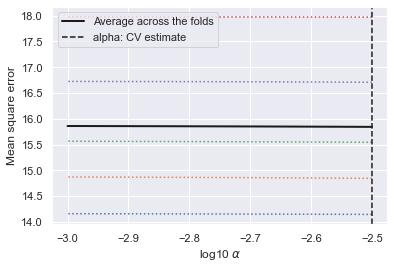

In [112]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
#plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.savefig('Results/Plots/lasso_MSE_fold_onJob.png', bbox_inches='tight')

Constant MSE 

#### 4.1.2 Optimal alpha as calculated using the cross-validation

In [113]:

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])


pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.0755
Out-of-sample Rsq:  0.0467


In [114]:
# rerun the regression with optmal penalty 

lass = pipe.fit(X_train, y_train)
y_pred=lass.predict(X_test)


In [115]:
# we can also check which coefficients were selected by LASSO 
pipe.named_steps['lasso'].coef_ # note the syntaxis pipe.named_steps

array([-2.92768301e-01, -4.37895738e-03,  1.79485478e-01,  2.66634984e-01,
        1.10977147e-01,  1.50864299e-01,  5.27825874e-02,  3.63455228e-02,
       -3.49254939e-03,  1.66284078e-01,  6.89236525e-03,  3.36450368e-02,
       -7.76292657e-04,  1.45261006e-01,  2.32172676e-02,  9.87026861e-03,
        8.37585710e-02,  8.79815338e-02, -6.36854490e-03, -1.16685746e-02,
        1.32554332e-02,  1.51615123e-02,  3.10832891e-02,  5.02126254e-02,
        1.18569321e-02,  1.23580449e-02,  3.40862436e-02, -4.17966999e-02,
       -1.10009115e-04,  6.06117146e-02, -4.29876198e-02,  3.72941227e-02,
       -1.05268212e-01,  9.92575208e-02,  0.00000000e+00,  1.25833475e-01,
       -1.62637327e-01, -9.42766503e-02, -5.14026856e-02,  1.36023837e-02,
        0.00000000e+00,  9.39182046e-03,  1.89295336e-02,  1.79382387e-02,
        3.99061863e-02,  7.95030246e-02,  9.84108077e-02,  0.00000000e+00,
        7.15664297e-02, -3.12759585e-02, -5.10737423e-02,  5.12261949e-02,
       -3.96115383e-02, -

In [116]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

,Lasso coefficient,Feature
0,-0.292768,age_r
1,-0.004379,j_q03b
2,0.179485,yrsget
3,0.266635,c_q09
4,0.110977,c_q10a
...,...,...
156,0.082664,b_q10a_Yes
157,-0.009883,computerexperience_Yes
158,-0.245957,skill_1
159,-0.200424,skill_2


In [117]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient,Feature
0,-0.292768,age_r
1,-0.004379,j_q03b
2,0.179485,yrsget
3,0.266635,c_q09
4,0.110977,c_q10a
...,...,...
156,0.082664,b_q10a_Yes
157,-0.009883,computerexperience_Yes
158,-0.245957,skill_1
159,-0.200424,skill_2


In [118]:
imp.to_excel('results\models\lin_lasso_coef.xlsx')

In [119]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp= imp[~imp['Feature'].astype(str).str.startswith('isic1c')]
imp= imp[~imp['Feature'].astype(str).str.startswith('cntryid')]
imp.reset_index(drop=True, inplace=True)
imp


,Lasso coefficient,Feature
0,-0.292768,age_r
1,-0.004379,j_q03b
2,0.179485,yrsget
3,0.266635,c_q09
4,0.110977,c_q10a
...,...,...
96,0.082664,b_q10a_Yes
97,-0.009883,computerexperience_Yes
98,-0.245957,skill_1
99,-0.200424,skill_2


In [120]:
from tabulate import tabulate
headers = ["Coefficients", "Feature"]
print(tabulate(imp, headers, tablefmt="pipe"))

|     |   Coefficients | Feature                                                                               |
|----:|---------------:|:--------------------------------------------------------------------------------------|
|   0 |   -0.292768    | age_r                                                                                 |
|   1 |   -0.00437896  | j_q03b                                                                                |
|   2 |    0.179485    | yrsget                                                                                |
|   3 |    0.266635    | c_q09                                                                                 |
|   4 |    0.110977    | c_q10a                                                                                |
|   5 |    0.150864    | readytolearn                                                                          |
|   6 |    0.0527826   | earnmthallppp                                                          

In [121]:
imp.sort_values("Lasso coefficient").head(30)

,Lasso coefficient,Feature
0,-0.292768,age_r
98,-0.245957,skill_1
99,-0.200424,skill_2
35,-0.162637,d_q13c_Less than once a month
63,-0.159099,g_q05e_Every day
32,-0.105268,edcat8_Tertiary – professional degree (ISCED 5B)
71,-0.098560,"b_q01b_Engineering, manufacturing and construc..."
51,-0.094804,b_q10c_Not useful at all
36,-0.094277,d_q13c_Less than once a week but at least once...
95,-0.079505,g_q06_Straightforward


In [122]:
imp.sort_values("Lasso coefficient", ascending = False).head(30)

,Lasso coefficient,Feature
3,0.266635,c_q09
73,0.186274,b_q01b_Health and welfare
2,0.179485,yrsget
61,0.177066,"d_q04_t_Employee, supervising more than 5 people"
9,0.166284,d_q03_The public sector (for example the local...
5,0.150864,readytolearn
55,0.150533,b_q26a_t_Yes
53,0.149878,b_q10c_Very useful
13,0.145261,g_q05g_Never
68,0.127005,d_q14_Extremely satisfied


In [127]:
# accuracy for lasso
lass = pipe.fit(X_train, y_train)
y_pred=lass.predict(X_test)

print('Training accuracy:', lass.score(X_train, y_train))
print('Test accuracy:', lass.score(X_test, y_test))


Training accuracy: 0.07545297765299941
Test accuracy: 0.04666758148414141


In [125]:
# accuracy for OLS
pipe_OLS = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept=True, normalize=False, copy_X=False))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe_OLS.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe_OLS.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe_OLS.score(X_test, y_test))


In-sample Rsq:  0.0758
Out-of-sample Rsq:  0.0441


#### Results
When Lasso is applied as a regularization method, 148 coefficients remain while 12 are being excluded for the regression of on the job training on the various explanatory variables. High skill level jobs and medium skill level jobs reduce the number of trainings stronger than low skilled jobs.

### 4.2 Lasso for open education

In [128]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

nona = y_X.drop(columns = ["on_job","isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]
y = nona["open_educ"]
X = nona.iloc[:, 1:]

In [129]:

#X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
#X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.0786
Out-of-sample Rsq:  0.0070


Computing regularization path using the lasso...
Ready


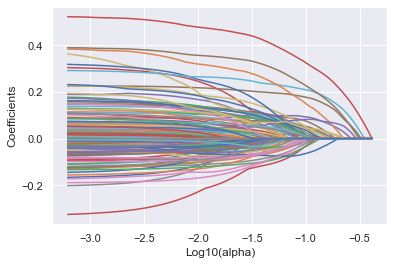

In [130]:
# lasso path
from sklearn.linear_model import lasso_path, enet_path

X = StandardScaler().fit_transform(X_train) 
# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y_train, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('Coefficients')
#plt.title('Lasso Path')
plt.axis('tight')
#plt.grid(axis='both')
#plt.show()

plt.savefig('Results/Plots/lasso_path_openeduc.png', bbox_inches='tight', dpi=100)

#### 4.2.1 Selecting optimal $\lambda$ with cross-validation and information criteria

In [131]:
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-3, -2.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_train, y_train)
t_cv = time.time() - t1
print("Ready")

l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .6f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.003162 
Training time =  0.3443s 


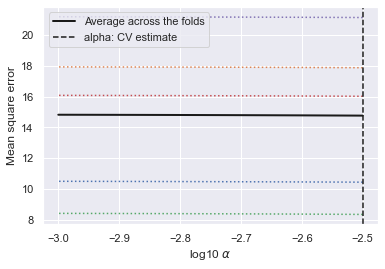

In [132]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
#plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.savefig('Results/Plots/lasso_MSE_fold_openeduc.png', bbox_inches='tight')


In [133]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])

pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.0987
Out-of-sample Rsq: -0.0071


In [134]:
# we can also check which coefficients were selected by LASSO 
pipe.named_steps['lasso'].coef_ # note the syntaxis pipe.named_steps

array([-0.15199661, -0.01388165,  0.02544434,  0.28890473, -0.01360903,
        0.22463885, -0.06221463, -0.11814665, -0.01997541,  0.06030193,
       -0.03606601, -0.03605343, -0.02002208, -0.        , -0.05072335,
        0.14466984,  0.02893774,  0.06621059,  0.04074617, -0.05843847,
       -0.06104988,  0.03993038, -0.01145206,  0.11185662,  0.08123808,
        0.15120384,  0.02407091, -0.00100283, -0.00963012, -0.09946666,
        0.01137704,  0.04435406, -0.11359096, -0.08854773,  0.19157642,
        0.14604403, -0.08453689,  0.04026943, -0.04274929, -0.03075818,
       -0.02336986, -0.11702047, -0.01865474, -0.07987013,  0.04168603,
       -0.11095839, -0.05982418, -0.18278401, -0.        ,  0.11108651,
       -0.06419084, -0.14666924,  0.04492368,  0.        ,  0.00554126,
       -0.06342684, -0.18346454,  0.02374862,  0.29808861,  0.13645922,
       -0.1275056 , -0.04718118, -0.09369963, -0.29823474, -0.03703529,
        0.08927989,  0.01241128,  0.0364113 ,  0.21665181,  0.03

In [135]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

,Lasso coefficient,Feature
0,-0.151997,age_r
1,-0.013882,j_q03b
2,0.025444,yrsget
3,0.288905,c_q09
4,-0.013609,c_q10a
...,...,...
156,0.139708,b_q10a_Yes
157,-0.000000,computerexperience_Yes
158,0.122725,skill_1
159,-0.006552,skill_2


In [136]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient,Feature
0,-0.151997,age_r
1,-0.013882,j_q03b
2,0.025444,yrsget
3,0.288905,c_q09
4,-0.013609,c_q10a
...,...,...
154,-0.032840,g_q06_Moderate
156,0.139708,b_q10a_Yes
158,0.122725,skill_1
159,-0.006552,skill_2


In [137]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp= imp[~imp['Feature'].astype(str).str.startswith('isic1c')]
imp= imp[~imp['Feature'].astype(str).str.startswith('cntryid')]
imp.reset_index(drop=True, inplace=True)
imp

,Lasso coefficient,Feature
0,-0.151997,age_r
1,-0.013882,j_q03b
2,0.025444,yrsget
3,0.288905,c_q09
4,-0.013609,c_q10a
...,...,...
98,-0.032840,g_q06_Moderate
99,0.139708,b_q10a_Yes
100,0.122725,skill_1
101,-0.006552,skill_2


In [138]:
from tabulate import tabulate
headers = ["Coefficients", "Feature"]
print(tabulate(imp, headers, tablefmt="pipe"))

|     |   Coefficients | Feature                                                                               |
|----:|---------------:|:--------------------------------------------------------------------------------------|
|   0 |    -0.151997   | age_r                                                                                 |
|   1 |    -0.0138816  | j_q03b                                                                                |
|   2 |     0.0254443  | yrsget                                                                                |
|   3 |     0.288905   | c_q09                                                                                 |
|   4 |    -0.013609   | c_q10a                                                                                |
|   5 |     0.224639   | readytolearn                                                                          |
|   6 |    -0.0622146  | earnmthallppp                                                          

In [139]:
imp.sort_values("Lasso coefficient").head(30)

,Lasso coefficient,Feature
60,-0.298235,g_q05d_Never
53,-0.183465,b_q10c_Somewhat useful
46,-0.182784,g_q05h_Never
0,-0.151997,age_r
49,-0.146669,g_q05f_Never
69,-0.130120,pared_Neither parent has attained upper secondary
57,-0.127506,g_q05d_Every day
7,-0.118147,g_q08_Yes
40,-0.117020,g_q05a_Less than once a week but at least once...
31,-0.113591,edcat8_Tertiary – professional degree (ISCED 5B)


In [140]:
imp.sort_values("Lasso coefficient", ascending = False).head(30)

,Lasso coefficient,Feature
67,0.300772,g_q05e_Never
55,0.298089,g_q04_Yes
3,0.288905,c_q09
84,0.283447,d_q06a_More than 1000 people
5,0.224639,readytolearn
65,0.216652,g_q05e_Less than once a month
76,0.210219,b_q01b_Health and welfare
33,0.191576,"edcat8_Upper secondary (ISCED 3A-B, C long)"
78,0.160260,"b_q01b_Science, mathematics and computing"
24,0.151204,d_q09_No contract


In [141]:

lass = pipe.fit(X_train, y_train)
y_pred=lass.predict(X_test)

print('Training accuracy:', lass.score(X_train, y_train))
print('Test accuracy:', lass.score(X_test, y_test))

Training accuracy: 0.09866731662464612
Test accuracy: -0.007127148829102259


In [142]:
# accuracy for OLS
pipe_OLS = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept=True, normalize=False, copy_X=False))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe_OLS.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe_OLS.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe_OLS.score(X_test, y_test))


In-sample Rsq:  0.0989
Out-of-sample Rsq: -0.0096
